# Using MetricFlow in Python

This notebook shows how to use the MetricFlow Python API in a Jupyter notebook environment to query metrics and dimensions. 

Full documentation for the MetricFlow Python client can be found [here](https://github.com/transform-data/metricflow/blob/main/metricflow/api/metricflow_client.py)

Import Packages

In [1]:
from metricflow import MetricFlowClient
import pandas as pd
import matplotlib.pyplot as plt

Set up MetricFlow client from config file. This file is generated when you run mf setup.

In [2]:
mf = MetricFlowClient.from_config(config_file_path="C:/Users/pompe/.metricflow/config.yml")

You can list metrics using the command line.

In [3]:
!mf list-metrics



- 🔍 Looking for all available metrics...

\ 🔍 Looking for all available metrics...
v 🌱 We've found 13 metrics.
The list below shows metrics in the format of "metric_name: list of available dimensions"
• cancellations: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• cancellation_rate: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• revenue_usd: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• cancellations_mx: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_na: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_l7d_mx: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_mtd: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_na_l7d: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• new_custo

You can also list metrics with the list_metrics method.

In [4]:
mf.list_metrics().keys()

dict_keys(['cancellations', 'cancellation_rate', 'revenue_usd', 'cancellations_mx', 'transaction_usd_na', 'transaction_usd_l7d_mx', 'transaction_usd_mtd', 'transaction_usd_na_l7d', 'new_customers', 'transaction_amount_usd', 'transactions', 'quick_buy_amount_usd', 'quick_buy_transactions'])

You can see all available dimensions for a given metric or metrics using the list_dimensions method.

In [5]:
mf.list_dimensions(metric_names=["revenue_usd"])

[Dimension(name='customer__country__region'),
 Dimension(name='customer__ds'),
 Dimension(name='ds'),
 Dimension(name='is_large'),
 Dimension(name='quick_buy_transaction')]

You can store the results of the query in a Pandas dataframe using the query method and result_df attribute.

In [6]:
query_results = mf.query(metrics=["revenue_usd"], dimensions=["ds"])


In [7]:
df = query_results.result_df.sort_values("ds", ascending=True)
df.head()

,ds,revenue_usd
23,2022-03-07,488.01
16,2022-03-08,577.00
15,2022-03-09,7.66
0,2022-03-10,79.88
24,2022-03-11,0.00


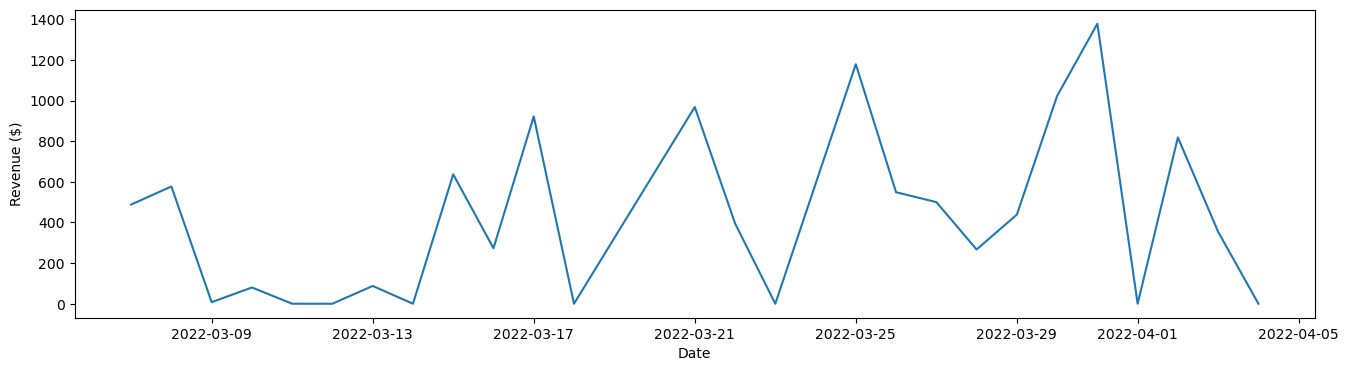

In [8]:
plt.figure(figsize=(16, 4))
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.plot(df.ds, df.revenue_usd)
plt.show()

In [15]:
query_results = mf.query(metrics=["transaction_usd_mtd"], dimensions=["metric_time"], order=["metric_time"])

A start time has not be supplied while querying for cumulative metrics. To avoid an excessive number of rows, the start time will be changed to 2021-11-10T23:28:12.667098
A end time has not be supplied while querying for cumulative metrics. To avoid an excessive number of rows, the end time will be changed to 2022-11-10T23:28:12.668607
Query spec updated to:
{'class': 'MetricFlowQuerySpec',
 'metric_specs': ({'class': 'MetricSpec',
                   'element_name': 'transaction_usd_mtd'},),
 'dimension_specs': (),
 'identifier_specs': (),
 'time_dimension_specs': ({'class': 'TimeDimensionSpec',
                           'element_name': 'metric_time',
                           'identifier_links': (),
                           'time_granularity': TimeGranularity.DAY},),
 'order_by_specs': ({'class': 'OrderBySpec',
                     'descending': False,
                     'metric_spec': None,
                     'dimension_spec': None,
                     'time_dimension_spec':

In [16]:
df = query_results.result_df
df

,metric_time,transaction_usd_mtd
0,2022-03-07,488.01
1,2022-03-08,1065.01
2,2022-03-09,1072.67
3,2022-03-10,1244.10
4,2022-03-11,1452.47
5,2022-03-12,1583.28
6,2022-03-13,1670.70
7,2022-03-14,1850.04
8,2022-03-15,2616.38
9,2022-03-16,3186.27


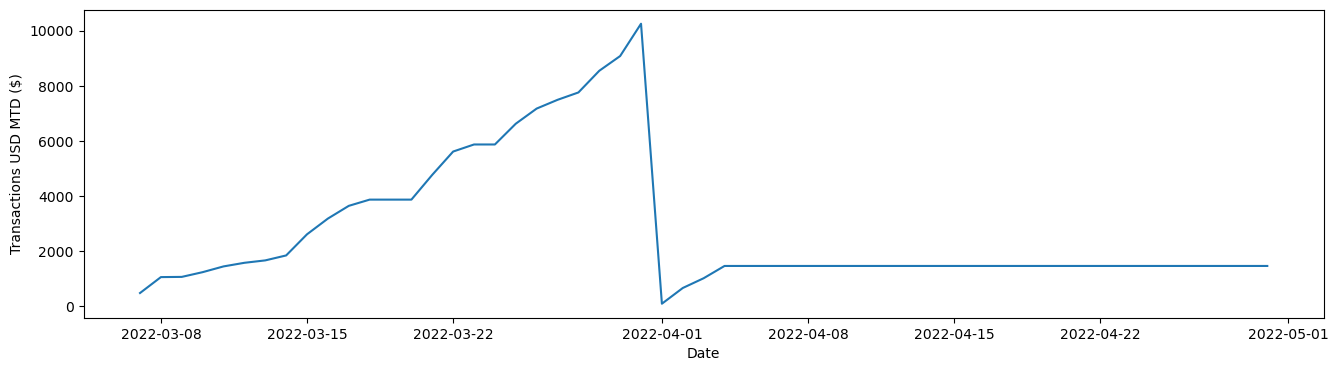

In [17]:
plt.figure(figsize=(16, 4))
plt.xlabel("Date")
plt.ylabel("Transactions USD MTD ($)")
plt.plot(df.metric_time, df.transaction_usd_mtd)
plt.show()